In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab08.ipynb")

# Lab 8: Normal Distribution and Variability of Sample Means

Welcome to Lab 8!

In today's lab, we will learn about [the variability of sample means](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) as well as [the normal distribution](https://www.inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html).


**Submission**: Once you’re finished, run all cells besides the last one, select File > Save Notebook, and then execute the final cell. Then submit the downloaded zip file, that includes your notebook,  according to your instructor's directions. 

First, set up the notebook by running the cell below.

In [2]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore')

import d8error

# 1. Normal Distributions

When we visualize the distribution of a sample, we are often interested in the mean and the standard deviation of the sample (for the rest of this lab, we will abbreviate “standard deviation” as “SD”). These two sample statistics can give us a bird’s eye view of the distribution -- by letting us know where the distribution sits on the number line and how spread out it is, respectively. 

We want to check if the data is linearly related, so we should look at the data.

**Question 1.1.** The next cell loads the table `births` from lecture, which is a large random sample of US births and includes information about mother-child pairs. 

Plot the distribution of mother’s ages from the table. Don’t change the last line, which will plot the mean of the sample on the distribution itself.


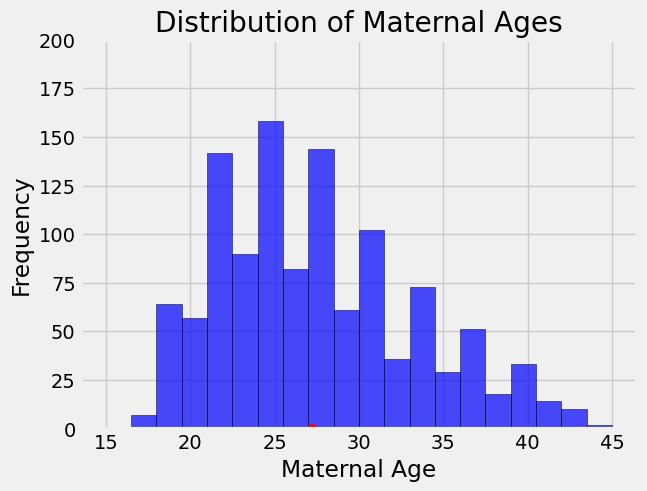

In [3]:
import matplotlib.pyplot as plt

births = Table.read_table('baby.csv')

maternal_ages = births.column("Maternal Age")

plt.hist(maternal_ages, bins=20, edgecolor='black', alpha=0.7, color='blue')
plt.xlabel("Maternal Age")
plt.ylabel("Frequency")
plt.title("Distribution of Maternal Ages")

plt.scatter(np.mean(maternal_ages), 0, color='red', zorder=2, s=50)
plt.ylim(-0.005, 200)

plt.show()

From the plot above, we can see that the mean is the center of gravity or balance point of the distribution. If you cut the distribution out of cardboard, and then placed your finger at the mean, the distribution would perfectly balance on your finger. Since the distribution above is right skewed (which means it has a long right tail), we know that the mean of the distribution is larger than the median, which is the “halfway” point of the data. Conversely, if the distribution had been left skewed, we know the mean would be smaller than the median.

**Question 1.2.** Run the following cell to compare the mean (red) and median (blue) of the distribution of mothers ages.


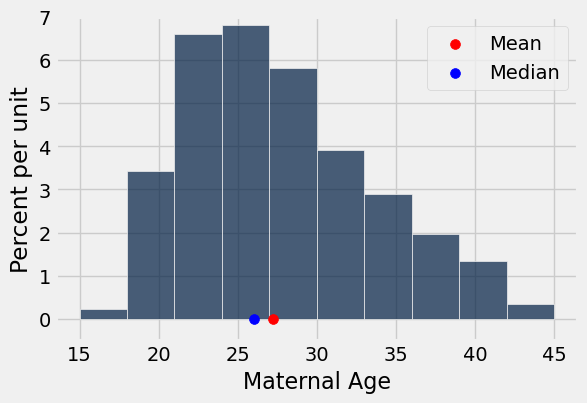

In [4]:
births.hist("Maternal Age")
plots.scatter(np.mean(births.column("Maternal Age")), 0, color='red', zorder=2, s=50, label="Mean")
plots.scatter(np.median(births.column("Maternal Age")), 0, color='blue', zorder=2, s=50, label="Median")
plots.legend()
plots.ylim(-0.005, 0.07);

We are also interested in the standard deviation of mother’s ages. The SD gives us a sense of how variable mothers' ages are around the average mothers' age. If the SD is large, then the mothers' ages should spread over a large range from the mean. If the SD is small, then the mothers' ages should be tightly clustered around the average mother age. 

**The SD of an array is defined as the root mean square of the deviations where the deviations are the difference between the original elements and their average.**

You can read more about Variability and SD in [Chapter 14.2](https://inferentialthinking.com/chapters/14/2/Variability.html). Fun fact! $\sigma$ (Greek letter sigma) is used to represent the SD and $\mu$ (Greek letter mu) is used for the mean. 

**Question 1.3.** Assign `age_mean` to the mean of the maternal ages and `age_sd` to the SD of the maternal ages. Then run the cell below to see the width of one SD (blue) from the sample mean (red) plotted on the histogram of maternal ages.


(-0.005, 0.07)

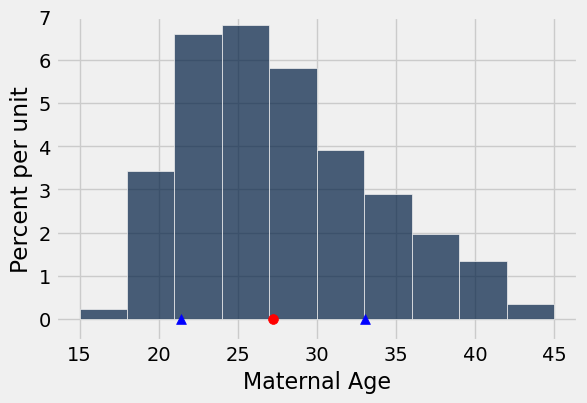

In [5]:

age_mean = np.mean(births.column("Maternal Age"))
age_sd = np.std(births.column("Maternal Age"))

births.hist("Maternal Age")

plots.scatter(age_mean, 0, color='red', zorder=2, s=50)
plots.scatter(age_mean + age_sd, 0, marker='^', color='blue', zorder=2, s=50)
plots.scatter(age_mean - age_sd, 0, marker='^', color='blue', zorder=2, s=50)

plots.ylim(-0.005, 0.07)


In [6]:
grader.check("q1_3")

q1_3 results: All test cases passed!

In this histogram, the standard deviation is not easy to identify just by looking at the graph.

However, the distributions of some variables allow us to easily spot the standard deviation on the plot. For example, if a sample follows a *normal distribution*, the standard deviation is easily spotted at the point of inflection (the point where the curve begins to change the direction of its curvature) of the distribution. 

**Question 1.4.** Fill in the following code to examine the distribution of maternal heights, which is roughly normally distributed. We’ll plot the standard deviation on the histogram, as before - notice where one standard deviation (blue) away from the mean (red) falls on the plot.


(-0.01, 0.16)

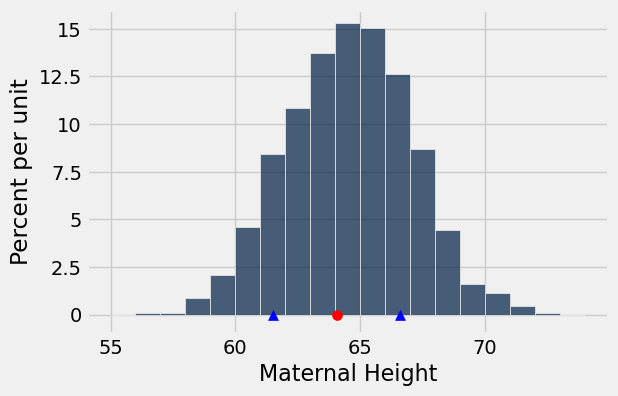

In [7]:
height_mean = np.mean(births.column("Maternal Height"))
height_sd = np.std(births.column("Maternal Height"))

births.hist("Maternal Height", bins=np.arange(55, 75, 1))

plots.scatter(height_mean, 0, color='red', zorder=2, s=50)
plots.scatter(height_mean + height_sd, 0, marker='^', color='blue', zorder=2, s=50)
plots.scatter(height_mean - height_sd, 0, marker='^', color='blue', zorder=2, s=50)

plots.ylim(-0.01, 0.16)


In [8]:
grader.check("q1_4")

q1_4 results: All test cases passed!

We don’t always know how a variable will be distributed, and making assumptions about whether or not a variable will follow a normal distribution is dangerous. However, the **Central Limit Theorem** defines one distribution that always follows a normal distribution. **The distribution of the *sums* and *means* of all large random samples drawn with replacement from a single distribution (regardless of the distribution’s original shape) will be normally distributed.** Remember that the Central Limit Theorem refers to the distribution of a *statistic* calculated from a distribution, not the distribution of the original sample or population. If this is confusing, ask a staff member!

The next section will explore distributions of sample means, and you will see how the standard deviation of these distributions depends on sample sizes.

# 2. Variability of the Sample Mean

By the [Central Limit Theorem](https://www.inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html), the probability distribution of the mean or sum of a large random sample is roughly normal. The bell curve is centered at the population mean. Some of the sample means are higher and some are lower, but the deviations from the population mean are roughly symmetric on either side, as we have seen repeatedly. 

In our simulations, we also noticed that the means of larger samples tend to be more tightly clustered around the population mean than means of smaller samples. In this section, we will quantify the [variability of the sample mean](https://www.inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) and develop a relation between the variability and the sample size.

Let's take a look at the salaries of employees of the City of San Francisco in 2014. The mean salary reported by the city government was about $75,463.92.

*Note: If you get stuck on any part of this lab, please refer to [Chapter 14 of the textbook](https://www.inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html).*

In [9]:
salaries = Table.read_table('sf_salaries_2014.csv').select("salary")
salaries.show(5)

salary
471953
390112
339654
326717
326233


In [10]:
salary_mean = np.mean(salaries.column('salary'))
print('Mean salary of San Francisco city employees in 2014: ', salary_mean.round(2))

Mean salary of San Francisco city employees in 2014:  75463.92


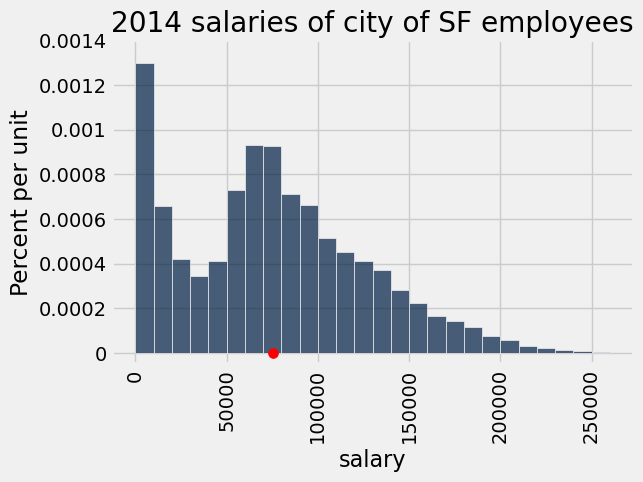

In [11]:
salaries.hist('salary', bins=np.arange(0, 250000+10000*2, 10000))
plots.scatter(salary_mean, 0, color='red', zorder=2, s=50)
plots.title('2014 salaries of city of SF employees')
plots.ylim(-0.0000005, 0.000014);

Clearly, the population *does not* follow a normal distribution. Keep that in mind as we progress through these exercises.

Let's take random samples **with replacement** and look at the probability distribution of the sample mean. As usual, we will use simulation to get an empirical approximation to this distribution.

**Question 2.1.** Define a function `one_sample_mean`. Its arguments should be `table` (the name of a table), `label` (the label of the column containing the variable), and `sample_size`(the number of employees in the sample). It should sample with replacement from the table and
return the mean of the `label` column of the sample.


In [12]:
def one_sample_mean(table, label, sample_size):
    new_sample = table.sample(sample_size, with_replacement=True)
    new_sample_mean = np.mean(new_sample.column(label))
    
    return new_sample_mean

salaries = Table.read_table('sf_salaries_2014.csv').select("salary")
salaries.show(5) 


salary
471953
390112
339654
326717
326233


In [13]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** Use `one_sample_mean` to define a function `simulate_sample_mean`. The arguments are the name of the `table`, the `label` of the column containing the variable, the `sample_size`, and the number of simulations (`repetitions`).

The function should sample with replacement from the table and calculate the mean of each sample. It should save the sample means in an array called `means`. The remaining code in the function displays an empirical histogram of the sample means.

*Note: We round all values to 2 decimal places because we are working with salaries.*


Sample size:  100
Population mean: 75463.92
Average of sample means:  75688.38
Population SD: 51697.03
SD of sample means: 5047.69


5047.6899415139251

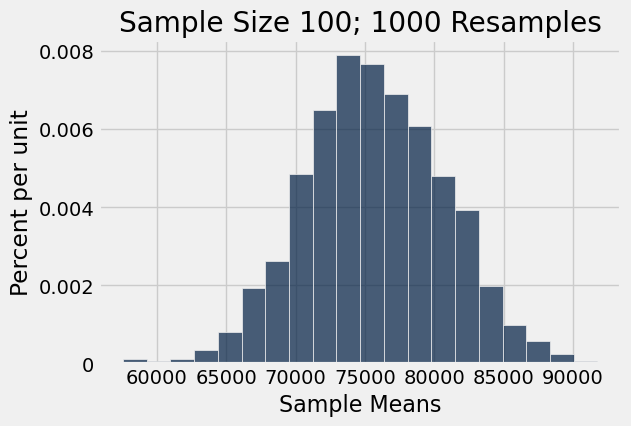

In [14]:
def simulate_sample_mean(table, label, sample_size, repetitions):
    means = make_array()

    for i in np.arange(repetitions):
        new_sample_mean = one_sample_mean(table, label, sample_size)
        means = np.append(means, new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)

    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size {sample_size}; {repetitions} Resamples'.format(sample_size=sample_size, repetitions=repetitions))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)).round(2))
    print("Average of sample means: ", np.mean(means).round(2))
    print("Population SD:", np.std(table.column(label)).round(2))
    print("SD of sample means:", np.std(means).round(2))
    return np.std(means)

simulate_sample_mean(salaries, 'salary', 100, 1000)


Verify with a peer or TA that you've implemented the function above correctly. If you haven't implemented it correctly, the rest of the lab won't work properly, so this step is crucial.

 In the following cell, we will create a sample of size 100 from `salaries` and graph it using our new `simulate_sample_mean` function.
 
 *Hint: You should see a distribution similar to something we've been talking about. If not, check your function.*

Sample size:  100
Population mean: 75463.92
Average of sample means:  75451.82
Population SD: 51697.03
SD of sample means: 5123.45


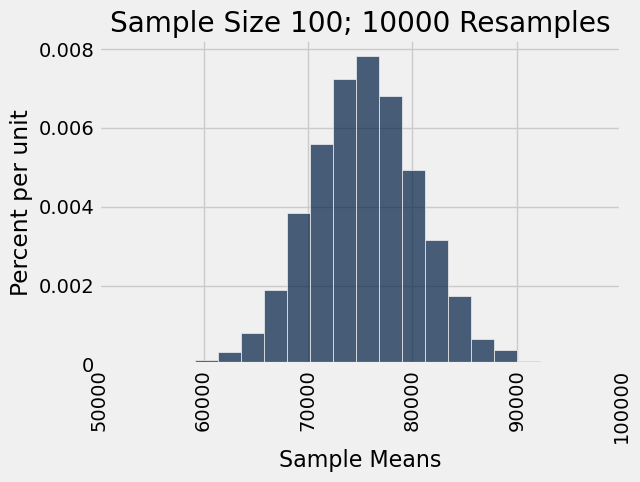

In [15]:
simulate_sample_mean(salaries, 'salary', 100, 10000) 
plots.xlim(50000, 100000);

Notice that our distribution of *sample means* looks approximately normal! Did it matter if our original distribution was normally distributed?

**Question 2.3.** Simulate two sample means, one for a sample of 400 salaries and one for a sample of 625 salaries. In each case, perform 10,000 repetitions. Don't worry about the `plots.xlim` or `plots.ylim` lines – they just make sure that all of the plots have the same x-axis and y-axis, respectively. 


Sample size:  400
Population mean: 75463.92
Average of sample means:  75482.22
Population SD: 51697.03
SD of sample means: 2571.78


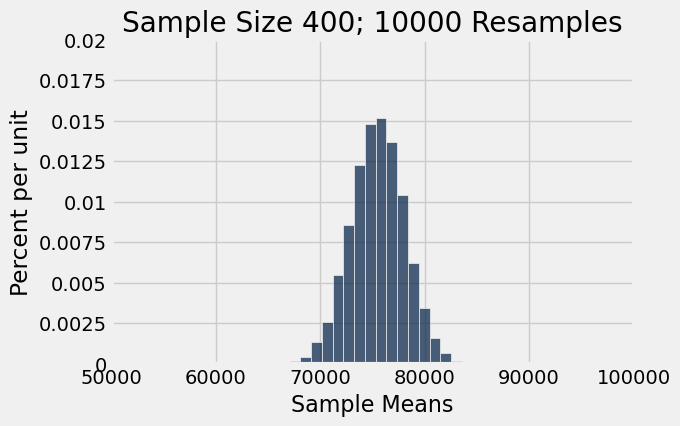



Sample size:  625
Population mean: 75463.92
Average of sample means:  75516.53
Population SD: 51697.03
SD of sample means: 2058.55


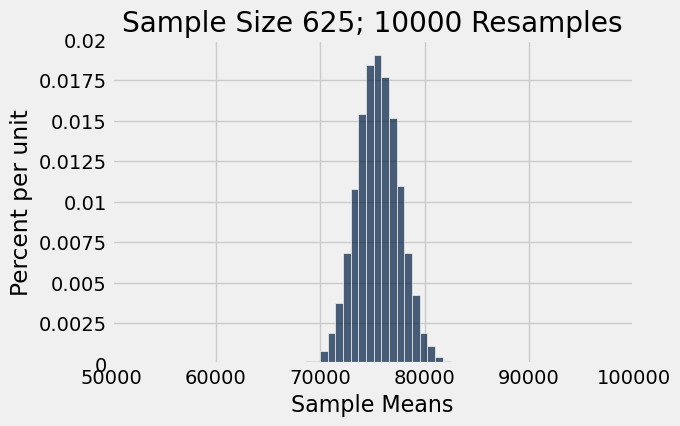

In [16]:
# Simulate the first sample mean (sample size: 400, repetitions: 10000)
simulate_sample_mean(salaries, 'salary', 400, 10000)
plots.xlim(50000, 100000)
plots.ylim(0, 0.0002)
plots.show()
print('\n')

# Simulate the second sample mean (sample size: 625, repetitions: 10000)
simulate_sample_mean(salaries, 'salary', 625, 10000)
plots.xlim(50000, 100000)
plots.ylim(0, 0.0002)
plots.show()


**Question 2.4.** Assign `q2_4` to an array of numbers corresponding to true statement(s) about the plots from 2.3. 

*Hint*: If a distribution is bell-shaped, what type of curve does it follow? 

1. We see the Central Limit Theorem (CLT) in action because the distributions of the sample means are bell-shaped.
2. We see the Law of Averages in action because the distributions of the sample means look like the distribution of the population.
3. One of the conditions for CLT is that we have to draw a small random sample with replacement from the population.
4. One of the conditions for CLT is that we have to draw a large random sample with replacement from the population.
5. One of the conditions for CLT is that the population must be normally distributed.


In [17]:
q2_4 = make_array(1, 2, 4)

In [18]:
grader.check("q2_4")

q2_4 results:
    q2_4 - 1 result:
        ❌ Test case failed
        Trying:
            import hashlib # This imports a hashing library for the autograder.
        Expecting nothing
        ok
        Trying:
            def get_hash(num):
                """Helper function for assessing correctness."""
                return hashlib.md5(str(num).encode()).hexdigest()
        Expecting nothing
        ok
        Trying:
            get_hash(set(np.array(q2_4).astype(int))) 
        Expecting:
            '3649655f87d3a44afa82f25eced24944'
        **********************************************************************
        Line 7, in q2_4 0
        Failed example:
            get_hash(set(np.array(q2_4).astype(int))) 
        Expected:
            '3649655f87d3a44afa82f25eced24944'
        Got:
            '1d54282ed3c682a9eb0499cce021d53f'

**Question 2.5.** Assign `q2_5` to an array of numbers corresponding to true statement(s) about the plots from 2.3.

1. Both plots in 2.3 are roughly centered around the population mean.
2. Both plots in 2.3 are roughly centered around the mean of a particular sample.
3. The distribution of sample means for sample size 625 has less variability than the distribution of sample means for sample size 400.
4. The distribution of sample means for sample size 625 has more variability than the distribution of sample means for sample size 400.


In [19]:
q2_5 = make_array(1,3)

In [20]:
grader.check("q2_5")

q2_5 results: All test cases passed!

Below, we'll look at what happens when we take an **increasing number of resamples of a fixed sample size.** Notice what number in the code changes, and what stays the same. How does the distribution of the resampled means change?

Sample size:  100
Population mean: 75463.92
Average of sample means:  75341.36
Population SD: 51697.03
SD of sample means: 4989.64


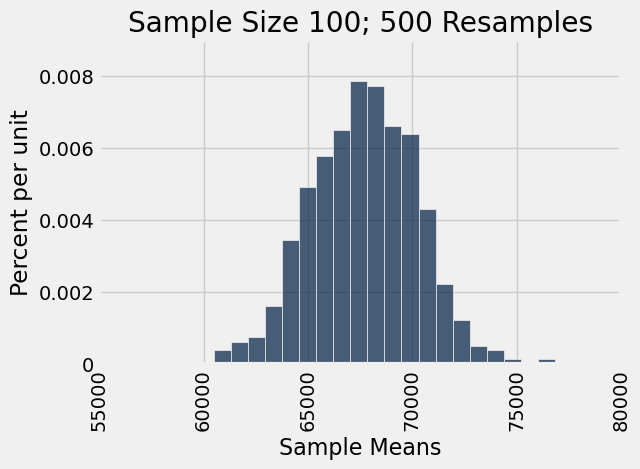

In [21]:
simulate_sample_mean(salaries, 'salary', 100, 500)
plots.xlim(50000, 100000)
plots.ylim(0, 0.00009);

Sample size:  100
Population mean: 75463.92
Average of sample means:  75356.03
Population SD: 51697.03
SD of sample means: 5057.16


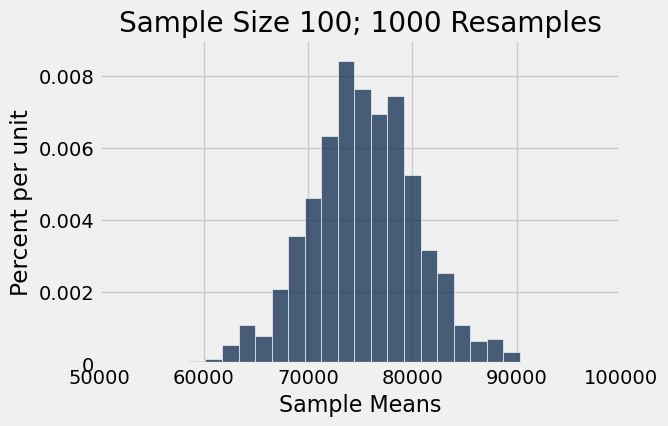

In [22]:
simulate_sample_mean(salaries, 'salary', 100, 1000)
plots.xlim(50000, 100000);
plots.ylim(0, 0.00009);

Sample size:  100
Population mean: 75463.92
Average of sample means:  75519.92
Population SD: 51697.03
SD of sample means: 5103.78


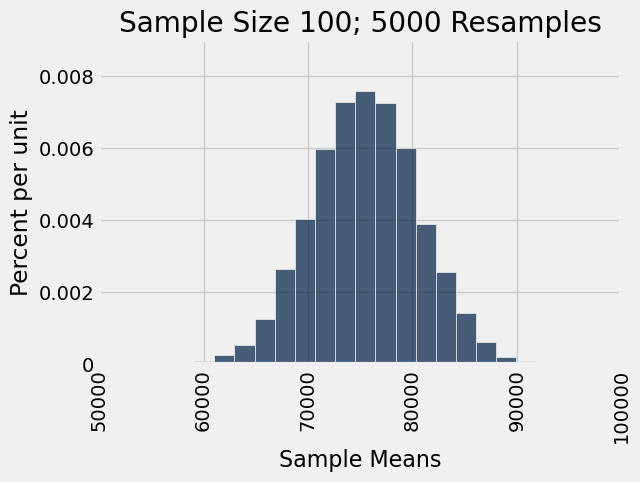

In [23]:
simulate_sample_mean(salaries, 'salary', 100, 5000)
plots.xlim(50000, 100000);
plots.ylim(0, 0.00009);

Sample size:  100
Population mean: 75463.92
Average of sample means:  75426.73
Population SD: 51697.03
SD of sample means: 5175.15


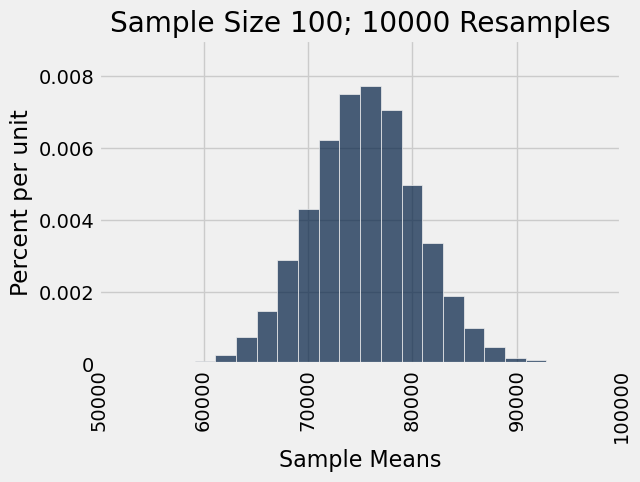

In [24]:
simulate_sample_mean(salaries, 'salary', 100, 10000)
plots.xlim(50000, 100000);
plots.ylim(0, 0.00009);

What did you notice about the distributions of sample means in the four histograms above? Discuss with your peers or ask a staff member.

**Question 2.6.** Assign the variable `SD_of_sample_means` to the integer corresponding to your answer to the following question:

When I increase the number of *resamples* that I take, for a *fixed* sample size, the SD of my sample means will...

1. Increase
2. Decrease
3. Stay about the same
4. Vary widely


In [25]:
SD_of_sample_means = 3

In [26]:
grader.check("q2_6")

q2_6 results: All test cases passed!

**Question 2.7.** Let's think about how the relationships between population SD, sample SD, and SD of sample means change with varying sample size. Which of the following is true? Assign the variable `pop_vs_sample` to an array of integer(s) that correspond to true statement(s).

*Hint 1:* The sample SD is different from the SD of sample means. 

1. Sample SD gets smaller with increasing sample size.
2. Sample SD gets larger with increasing sample size.
3. Sample SD becomes more consistent with population SD with increasing sample size.
4. SD of sample means gets smaller with increasing sample size.
5. SD of sample means gets larger with increasing sample size.
6. SD of sample means stays the same with increasing sample size.


In [27]:
pop_vs_sample = 3

In [28]:
grader.check("q2_7")

q2_7 results:
    q2_7 - 1 result:
        ❌ Test case failed
        Trying:
            import hashlib # This imports a hashing library for the autograder.
        Expecting nothing
        ok
        Trying:
            def get_hash(num):
                """Helper function for assessing correctness."""
                return hashlib.md5(str(num).encode()).hexdigest()
        Expecting nothing
        ok
        Trying:
            get_hash(set(np.array(pop_vs_sample).astype(int)))
        Expecting:
            '1d919a653870c713cf8bd17b9c9c65ee'
        **********************************************************************
        Line 6, in q2_7 0
        Failed example:
            get_hash(set(np.array(pop_vs_sample).astype(int)))
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_7 0[2]>", line 1, in <module>
                get_hash(set(np.array(pop_vs_sample).astype(int)))
            TypeError: iteration over a 0-d array

**Question 2.8.** Is there a relationship between the sample size and the standard deviation of the sample means? Assign `q2_8` to the number corresponding to the statement that answers this question.

*Hint:* [Chapter 14.5](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) of the textbook may be helpful.

1. The SD of the sample means is inversely proportional to the square root of sample size.
2. The SD of the sample means is directly proportional to the square root of sample size.


In [31]:
q2_8 = 2

In [32]:
grader.check("q2_8")

q2_8 results:
    q2_8 - 1 result:
        ❌ Test case failed
        Trying:
            import hashlib # This imports a hashing library for the autograder.
        Expecting nothing
        ok
        Trying:
            def get_hash(num):
                """Helper function for assessing correctness."""
                return hashlib.md5(str(num).encode()).hexdigest()
        Expecting nothing
        ok
        Trying:
            get_hash(int(q2_8))
        Expecting:
            'c4ca4238a0b923820dcc509a6f75849b'
        **********************************************************************
        Line 7, in q2_8 0
        Failed example:
            get_hash(int(q2_8))
        Expected:
            'c4ca4238a0b923820dcc509a6f75849b'
        Got:
            'c81e728d9d4c2f636f067f89cc14862c'

Throughout this lab, we have been taking many random samples from a population. However, all of these principles hold for bootstrapped resamples from a single sample. If your original sample is relatively large, all of your re-samples will also be relatively large, and so the SD of resampled means will be relatively small. 

In order to change the variability of your sample mean, you’d have to change the size of the original sample from which you are taking bootstrapped resamples.

## 3. Submission

<img src="jim.jpg" alt="drawing" width="300"/>

Jim really wanted to congratulate you on completing Lab 8!

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Then submit the zip file to the corresponding assignment according to your instructor's directions. 

**It is your responsibility to make sure your work is saved before running the last cell.**

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [33]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1_3 results: All test cases passed!

    q1_4 results: All test cases passed!

    q2_1 results: All test cases passed!

    q2_4 results:
        q2_4 - 1 result:
            ❌ Test case failed
            Trying:
                import hashlib # This imports a hashing library for the autograder.
            Expecting nothing
            ok
            Trying:
                def get_hash(num):
                    """Helper function for assessing correctness."""
                    return hashlib.md5(str(num).encode()).hexdigest()
            Expecting nothing
            ok
            Trying:
                get_hash(set(np.array(q2_4).astype(int))) 
            Expecting:
                '3649655f87d3a44afa82f25eced24944'
            **********************************************************************
            Line 7, in q2_4 0
    